<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%207/Le%C3%A7on_7_Demo_grad.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# ELE8812 - Segmentation

## Démo :  Détection de contours par gradient

### Référence : DIP 4e édition, Chapitre 10, « Basic edge detection » p.716

Dans ce démo, la méthode du gradient sera utilisée pour détecter les contours d’une image de cerveau. L’objectif est d’obtenir les contours principaux qui délimitent, par exemple, la matière blanche, la matière grise, les ventricules et le crâne.  Des opérateurs de Sobel permettront d’obtenir la composante horizontale et verticale du gradient de l’image. La magnitude du gradient sera approximée en additionnant la valeur absolue de chaque composante (norme L1). Cette approximation est souvent utilisée pour remplacer la norme L2 qui a un coût computationnel plus élevé en raison des racines carrées.

Afin d’augmenter la sélectivité de la méthode, un seuil sera appliqué sur les valeurs de magnitude. Tous les pixels ayant une valeur de magnitude de gradient plus élevée que le seuil seront considérés comme étant un contour. Ces pixels auront une valeur de 1 tandis que les autres pixels auront une valeur de 0.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.ndimage import sobel
from scipy import signal
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/evaalonsoortiz/ELE8812-demos.git Repo

Cloning into 'Repo'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 397 (delta 9), reused 18 (delta 6), pack-reused 362
Receiving objects: 100% (397/397), 42.17 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (138/138), done.


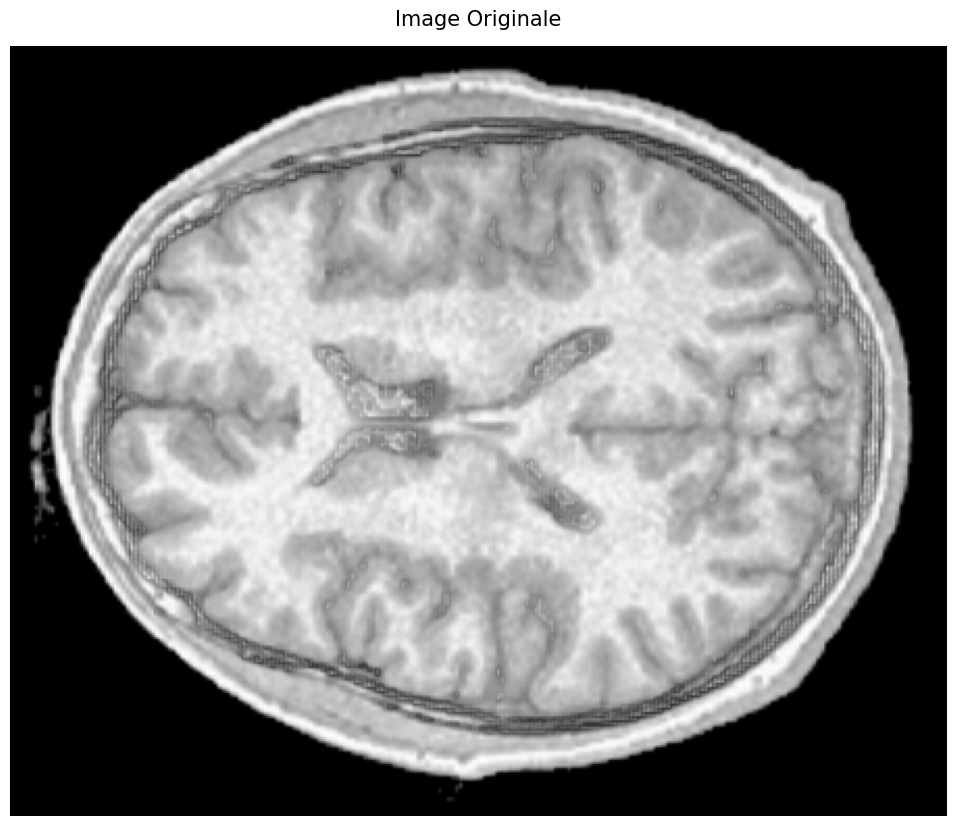

In [3]:
# Charger image
A = plt.imread('Repo/Data/cerveau.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

## Magnitude du gradient

Pour la visualisation, le résultat du seuillage est superposé à l’image originale. À cause du bruit présent dans l’image, la majorité des pixels sont détectés comme étant des contours avec un seuil de 0.1.

In [4]:
seuil1 = 0.1

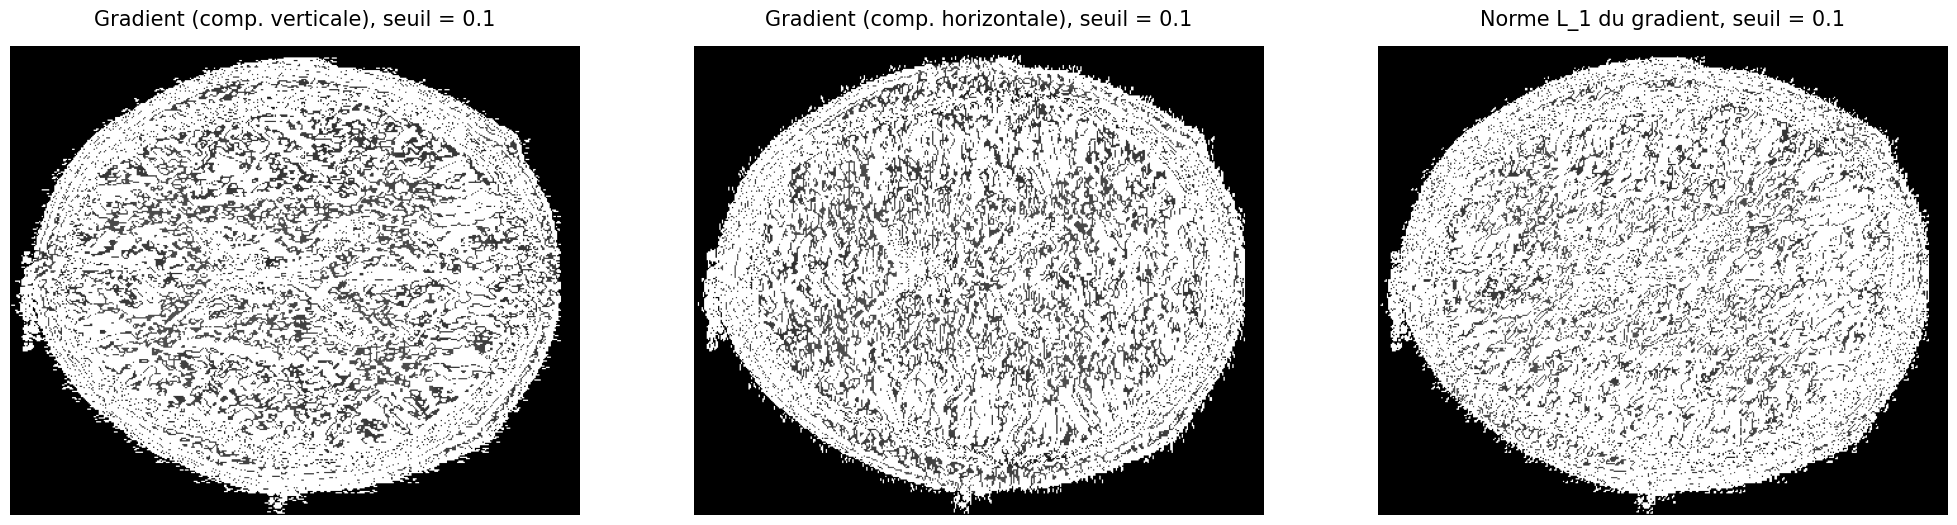

In [5]:
# Calcul gradient vertical, horizontal et magnitude
grad_y = sobel(A, axis=0)
grad_x = sobel(A, axis=1)

Mgradv = np.max(np.abs(grad_x))
Mgradh = np.max(np.abs(grad_y))
Mgrad = np.max(np.abs(grad_x) + np.abs(grad_y))

BWh = np.abs(grad_y) > (Mgradh * seuil1)
BWv = np.abs(grad_x) > (Mgradv * seuil1)
BW = (np.abs(grad_x) + np.abs(grad_y)) > (Mgrad * seuil1)

fac = 3
imgh = np.minimum(np.double(A)/(256*fac-1) + BWh, 1)
plt.subplot(131)
plt.imshow(imgh, cmap='gray'); plt.title('Gradient (comp. verticale), seuil = {0}'.format(seuil1)); plt.axis('off');

imgv = np.minimum(np.double(A)/(256*fac-1) + BWv, 1)
plt.subplot(132)
plt.imshow(imgv, cmap='gray'); plt.title('Gradient (comp. horizontale), seuil = {0}'.format(seuil1)); plt.axis('off');

img = np.minimum(np.double(A)/(256*fac-1) + BW, 1)
plt.subplot(133)
plt.imshow(img, cmap='gray'); plt.title('Norme L_1 du gradient, seuil = {0}'.format(seuil1)); plt.axis('off');

## Effet du seuil

L’augmentation du seuil à 0.5 permet d’augmenter la sélectivité de la détection : moins de pixels sont identifiés comme faisant partie des contours. Or, le bruit affecte encore la détection.

In [6]:
seuil2 = 0.5

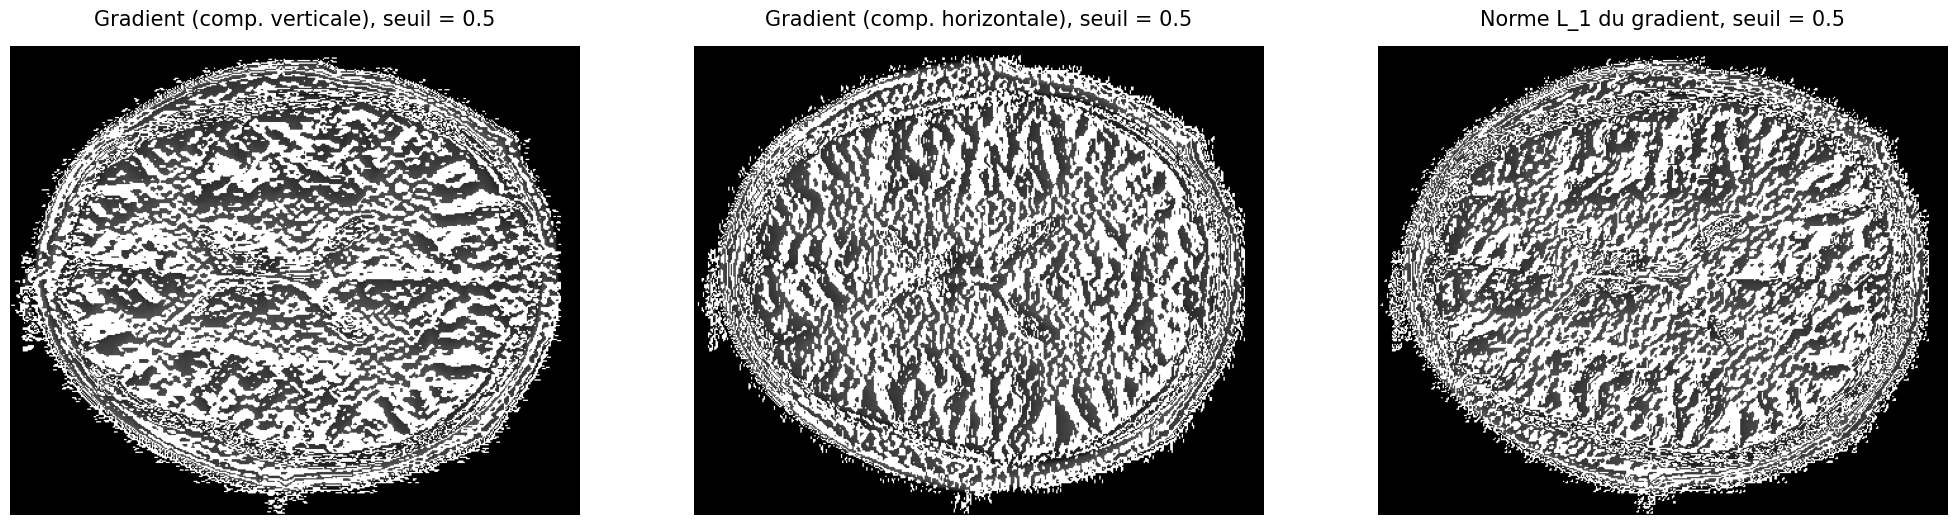

In [8]:
# Calcul gradient vertical, horizontal et magnitude
grad_y = sobel(A, axis=0)
grad_x = sobel(A, axis=1)

Mgradv = np.max(np.abs(grad_x))
Mgradh = np.max(np.abs(grad_y))
Mgrad = np.max(np.abs(grad_x) + np.abs(grad_y))

BWh = np.abs(grad_y) > (Mgradh * seuil2)
BWv = np.abs(grad_x) > (Mgradv * seuil2)
BW = (np.abs(grad_x) + np.abs(grad_y)) > (Mgrad * seuil2)

fac = 3
imgh = np.minimum(np.double(A)/(256*fac-1) + BWh, 1)
plt.subplot(131)
plt.imshow(imgh, cmap='gray'); plt.title('Gradient (comp. verticale), seuil = {0}'.format(seuil2)); plt.axis('off');

imgv = np.minimum(np.double(A)/(256*fac-1) + BWv, 1)
plt.subplot(132)
plt.imshow(imgv, cmap='gray'); plt.title('Gradient (comp. horizontale), seuil = {0}'.format(seuil2)); plt.axis('off');

img =   np.minimum(np.double(A)/(256*fac-1) + BW, 1)
plt.subplot(133)
plt.imshow(img, cmap='gray'); plt.title('Norme L_1 du gradient, seuil = {0}'.format(seuil2)); plt.axis('off'); plt.show();

## Filtrage au préalable de l'image

Afin de réduire l’effet du bruit, un filtre moyenneur de taille 5x5 est appliqué avant de calculer le gradient de l’image. Ceci permet de lisser les détails fins et de réduire le bruit. Avec ce traitement préalable, la méthode du gradient est beaucoup plus efficace. Beaucoup moins de « faux » contours sont détectés, même avec un seuil de 0.1. Certains groupes de pixels sont cependant encore faussement détectés comme étant des contours. On observe aussi que les contours ne sont pas fermés, certaines parties des vrais contours ne sont pas détectées.

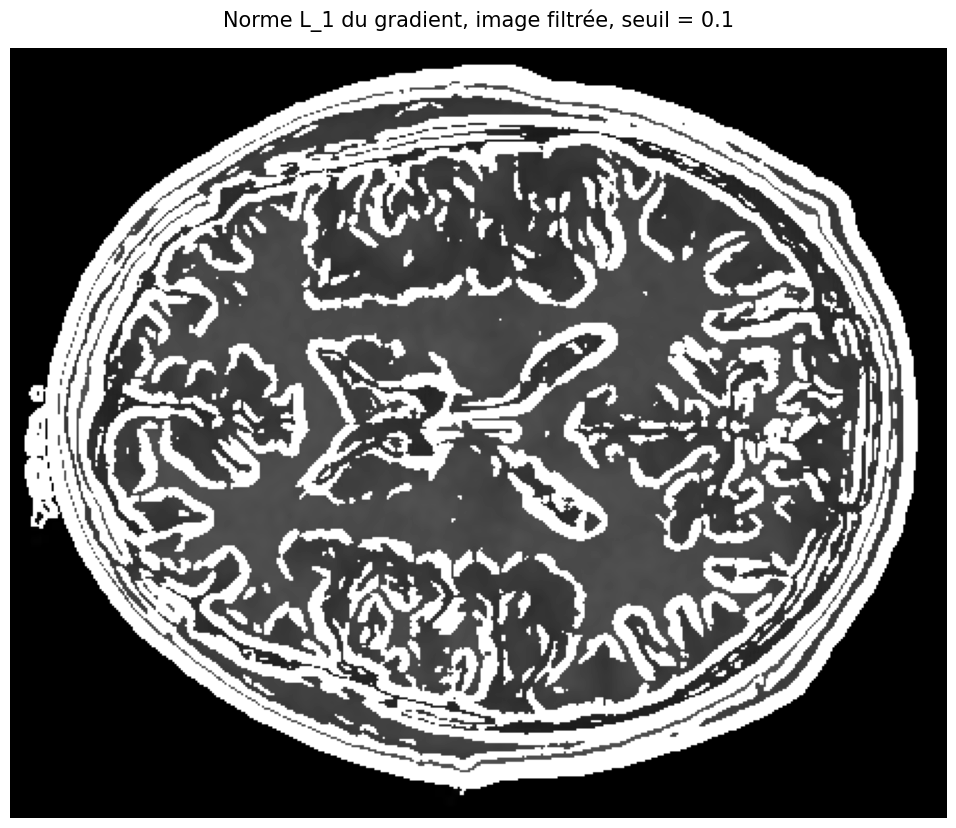

In [9]:
# Convolution avec un filtre moyenneur
h = np.ones((5, 5)) /25
filtered = signal.convolve2d(A,h,mode='same')

grad_y = sobel(filtered, axis=0)
grad_x = sobel(filtered, axis=1)

Mgrad = np.max(np.abs(grad_x)+np.abs(grad_y))
BW = (np.abs(grad_x)+np.abs(grad_y)) > (Mgrad * seuil1)

img = np.minimum(np.double(filtered)/(256*fac-1) + BW, 1)
plt.imshow(img, cmap='gray'); plt.title('Norme L_1 du gradient, image filtrée, seuil = {0}'.format(seuil1)); plt.axis('off'); plt.show();